# Explore here

In [29]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
archivo = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(archivo, sep=";")


In [30]:
#resumen todo junto pra demas proyectos con sus respectivos cambios
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

archivo= "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

df_original = pd.read_csv(archivo, sep=";")
df = pd.read_csv(archivo, sep=";")


datos,atributos=df.shape
print(f"tenemos {datos} de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"tenemos {num_duplicados} datos duplicados")
print()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

df=df_sin_duplicados

# Obtener información sobre tipos de datos y valores no nulos
df.info()

tenemos 41188 de datos y 21 atributos.

tenemos 12 datos duplicados

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.i

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
df.shape

(41176, 21)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [34]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41176, dtype: bool

In [35]:
df_duplicados = df[duplicados]
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [36]:
#eliminar lo que no aporta valor a la prediccion
df.drop(["contact", "month", "day_of_week","duration"], axis = 1, inplace = True)
df.head()


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
#para variable categorica (no numerica)
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

/tmp/ipykernel_3881/81394305.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
/tmp/ipykernel_3881/81394305.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)


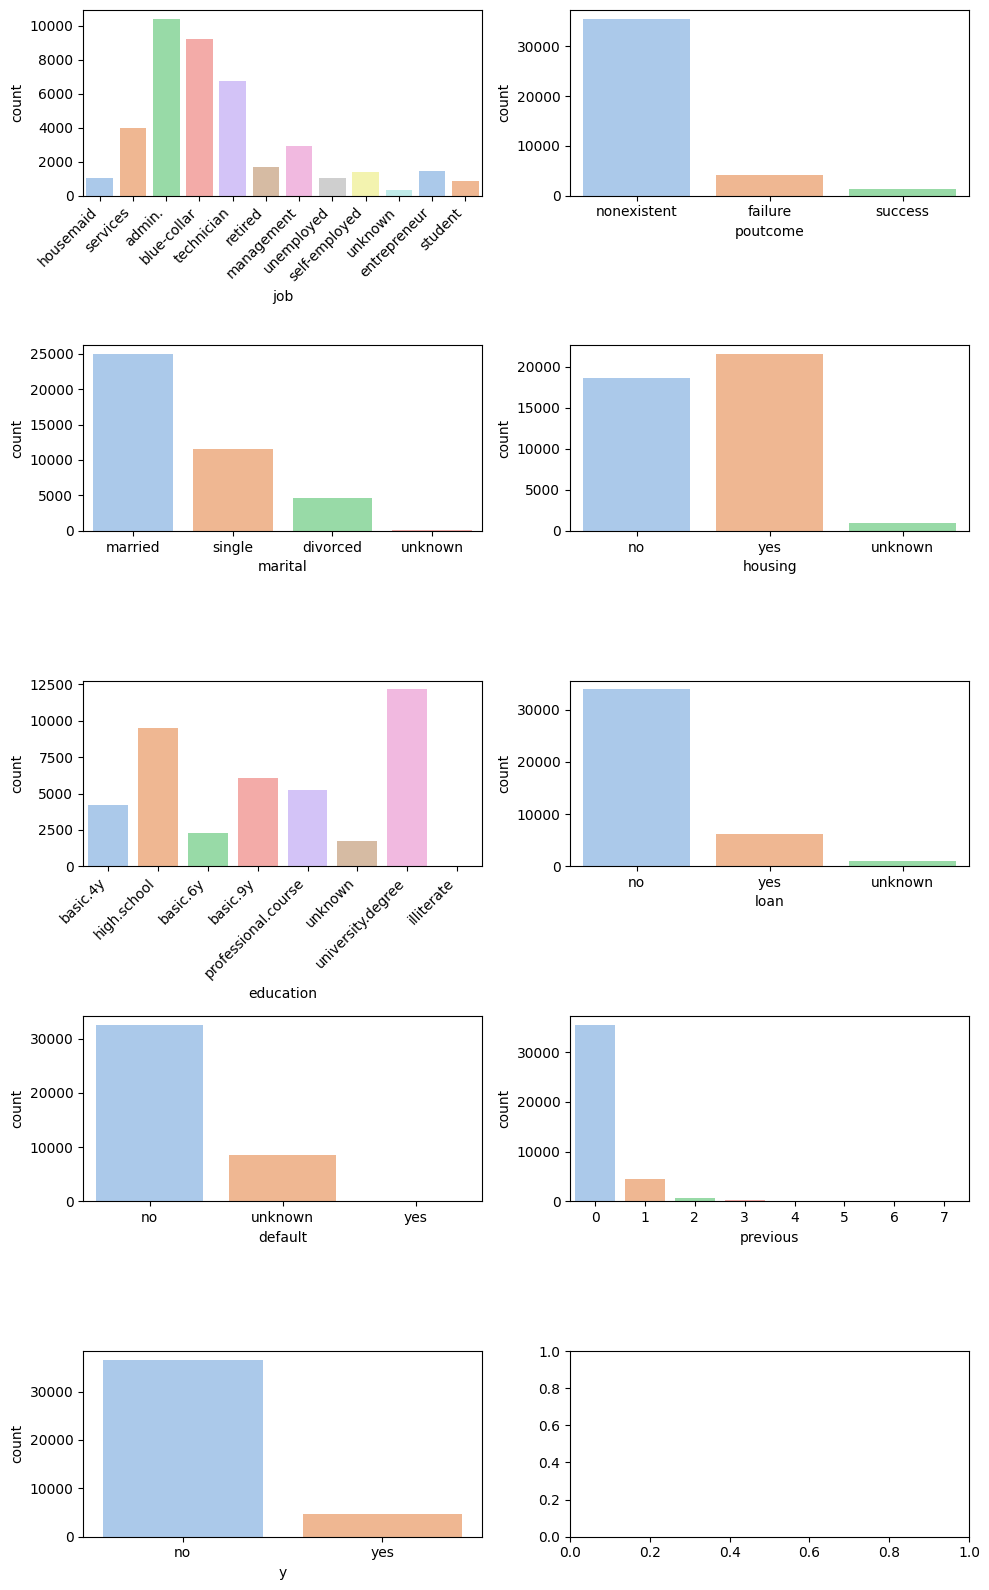

In [38]:
fig, axis = plt.subplots(5, 2, figsize = (10, 16))

sns.countplot(ax = axis[0,0], data = df, x = "job", palette='pastel', hue= "job", legend=False)
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[1,0], data = df, x = "marital", palette='pastel', hue= "marital", legend=False)
sns.countplot(ax = axis[2,0], data = df, x = "education", palette='pastel', hue= "education", legend=False)
axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[3,0], data = df, x = "default", palette='pastel', hue= "default", legend=False)
sns.countplot(ax = axis[0,1], data = df, x = "poutcome", palette='pastel', hue= "poutcome", legend=False)
sns.countplot(ax = axis[1,1], data = df, x = "housing", palette='pastel', hue= "housing", legend=False)
sns.countplot(ax = axis[2,1], data = df, x = "loan", palette='pastel', hue= "loan", legend=False)
sns.countplot(ax = axis[3,1], data = df, x = "previous", palette='pastel', hue= "previous", legend=False)
sns.countplot(ax = axis[4,0], data = df, x = "y", palette='pastel', hue= "y", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [39]:
# Eliminamos la variable "poutcome" por falta de datos
df.drop(["poutcome"], axis = 1, inplace = True)

# se unifican las basic
df['education'] = df['education'].replace({'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic'})
df.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


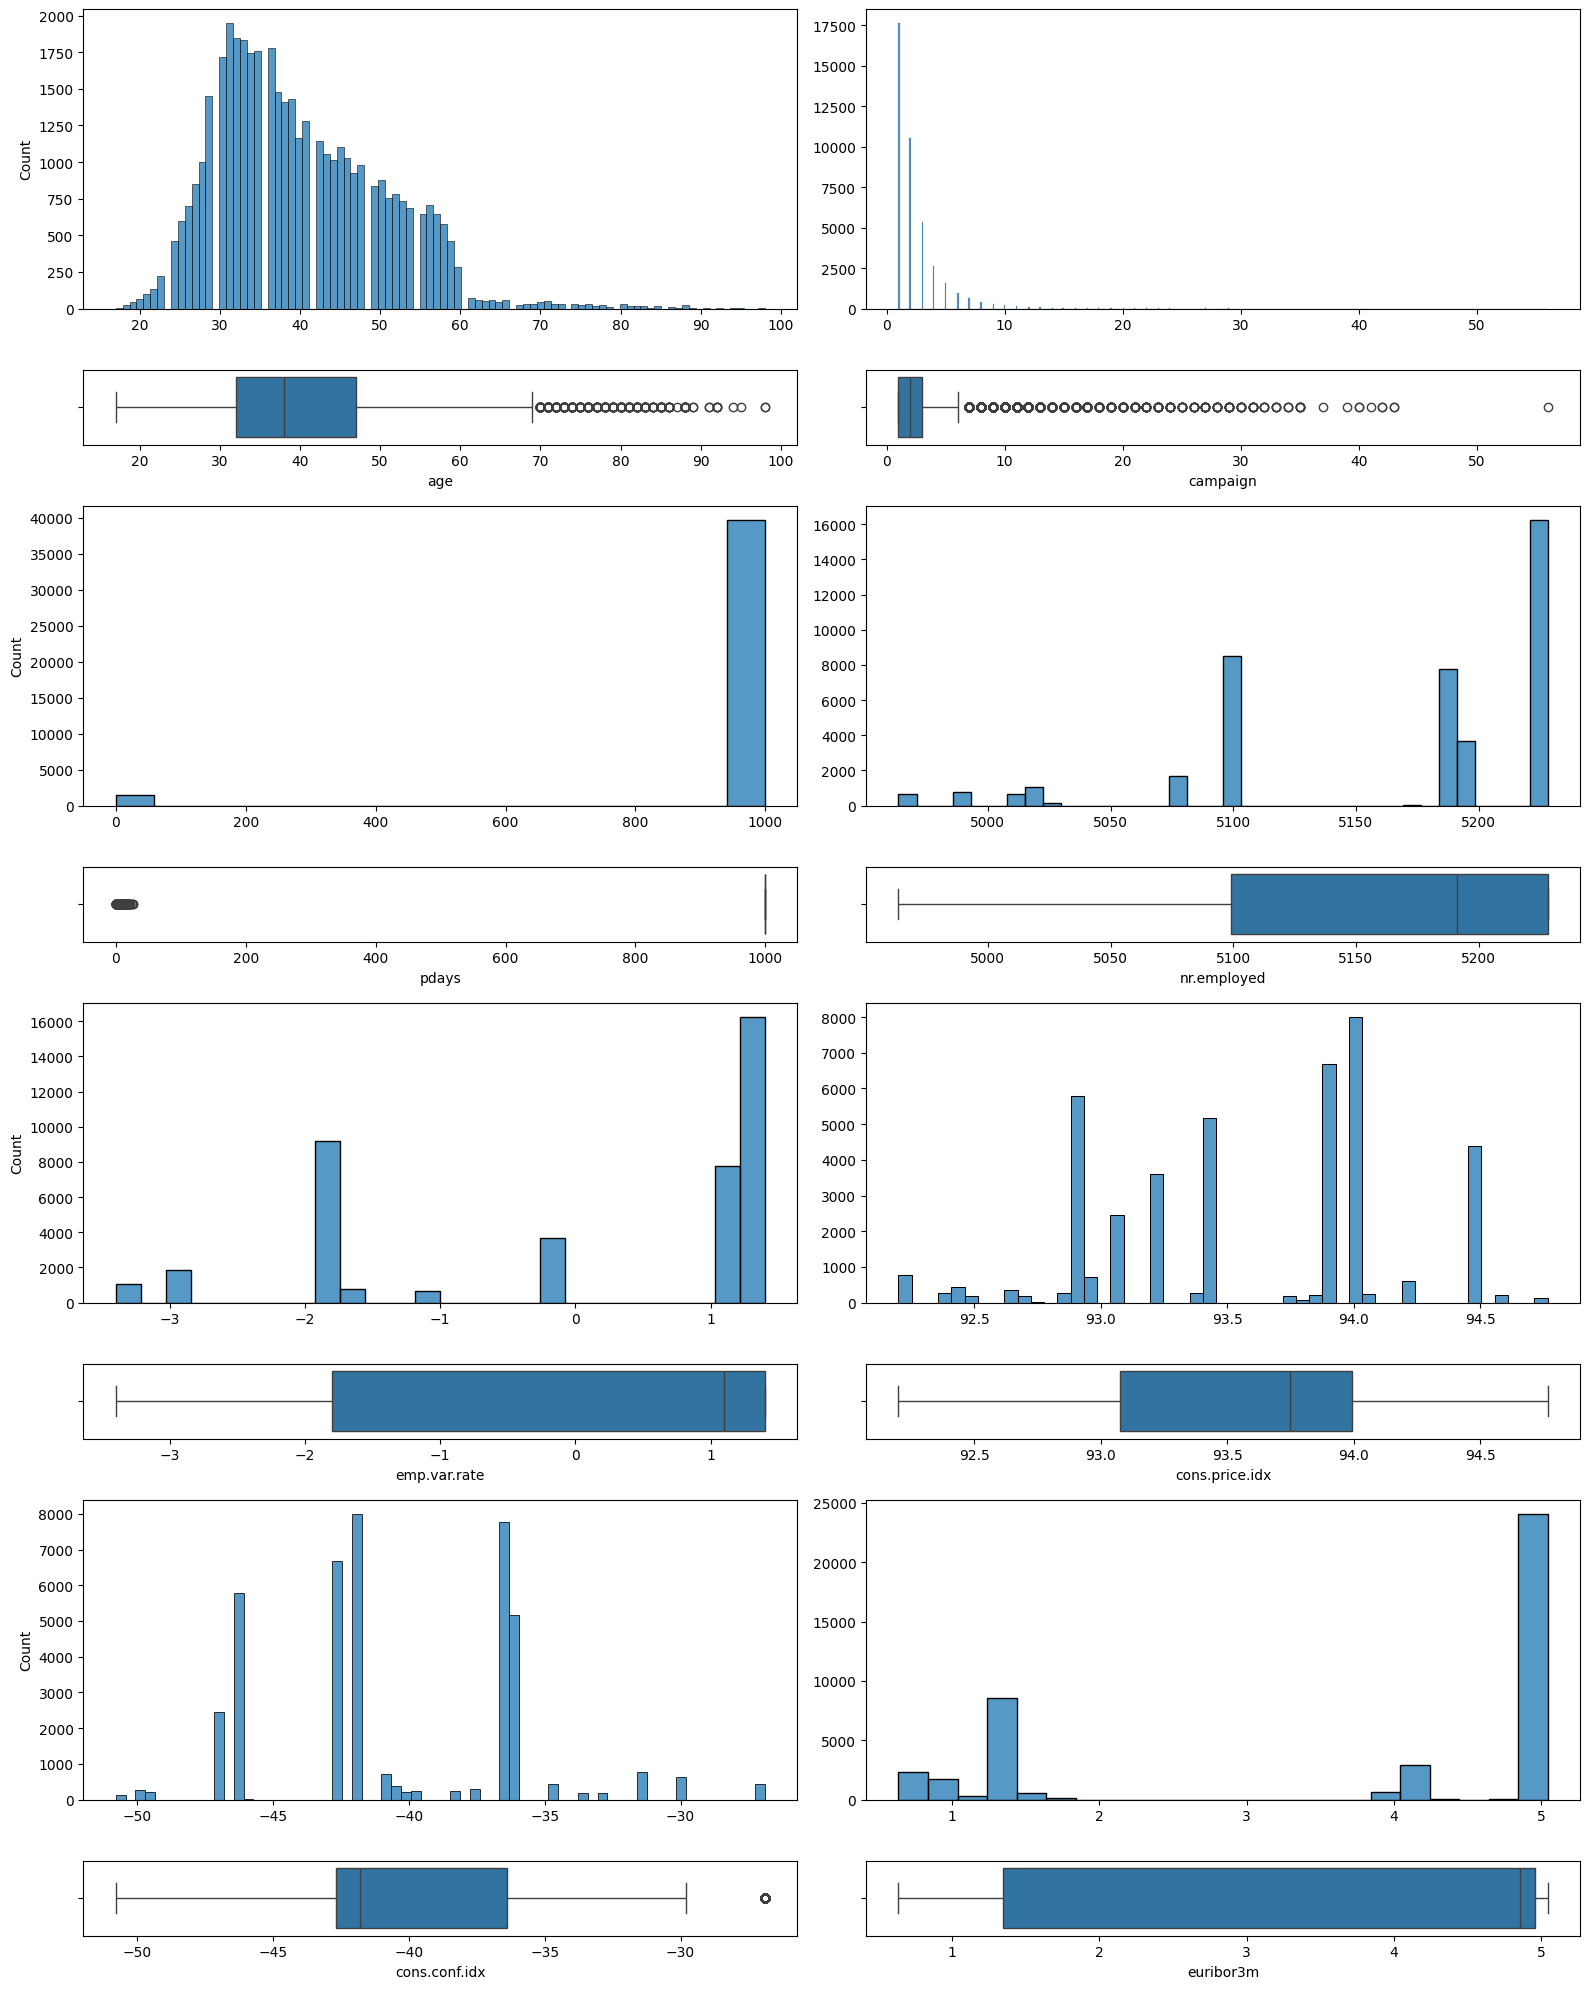

In [40]:
fig, axis = plt.subplots(8, 2, figsize = (16, 20), gridspec_kw={'height_ratios': [6, 1.5, 6, 1.5, 6, 1.5, 6, 1.5]})

			

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "campaign")

sns.histplot(ax = axis[2, 0], data = df, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "pdays")

sns.histplot(ax = axis[2, 1], data = df, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "nr.employed")

sns.histplot(ax = axis[4, 0], data = df, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "emp.var.rate")

sns.histplot(ax = axis[4, 1], data = df, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "cons.price.idx")

sns.histplot(ax = axis[6, 0], data = df, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[6, 1], data = df, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "euribor3m")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

la mayoria se encuentra entre los 29 y 41 años

In [41]:
df.pdays.value_counts()


pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [42]:
#eliminamos por que la cantidad de 999 es algo fuera de lo normal
df.drop(["pdays"], axis = 1, inplace = True)


/tmp/ipykernel_3881/3197001113.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
/tmp/ipykernel_3881/3197001113.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha="right", fontsize=10)


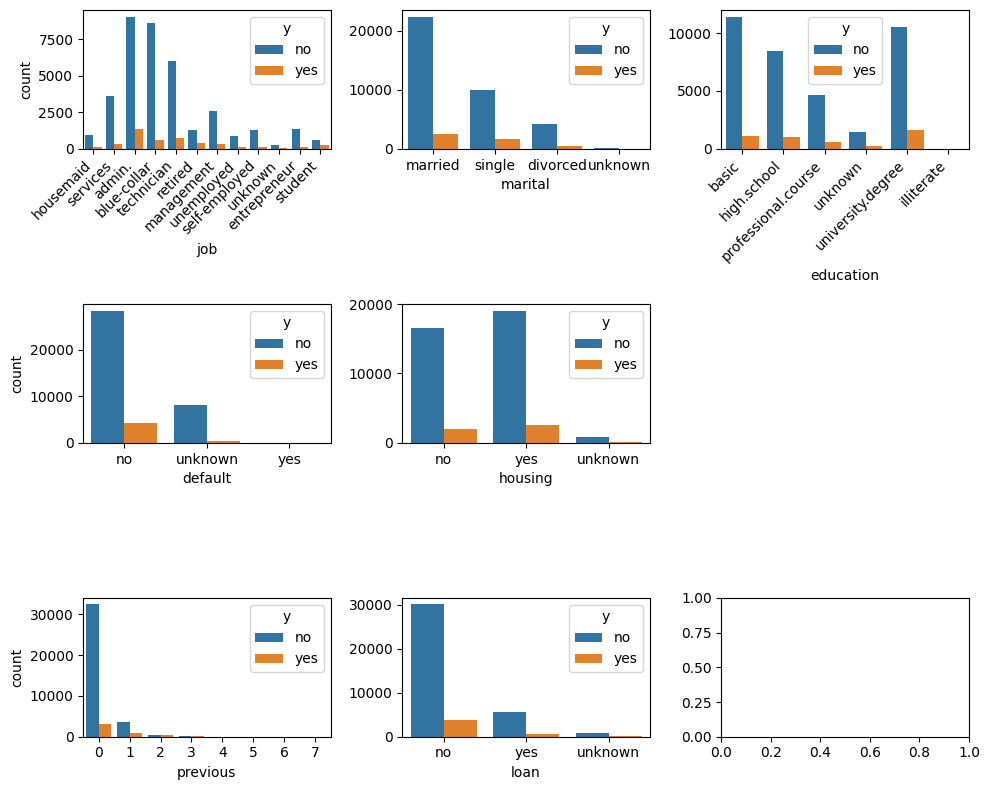

In [43]:
fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "y").set(ylabel = None)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[1, 0], data = df, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = df, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = df, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = df, x = "previous", hue = "y")


plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

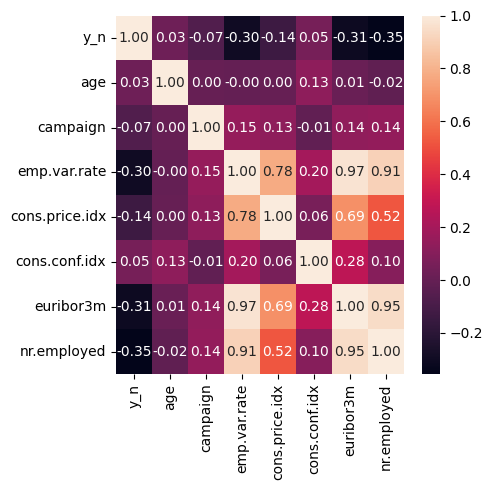

In [44]:
df["y_n"] = pd.factorize(df["y"])[0]

fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["y_n", "age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

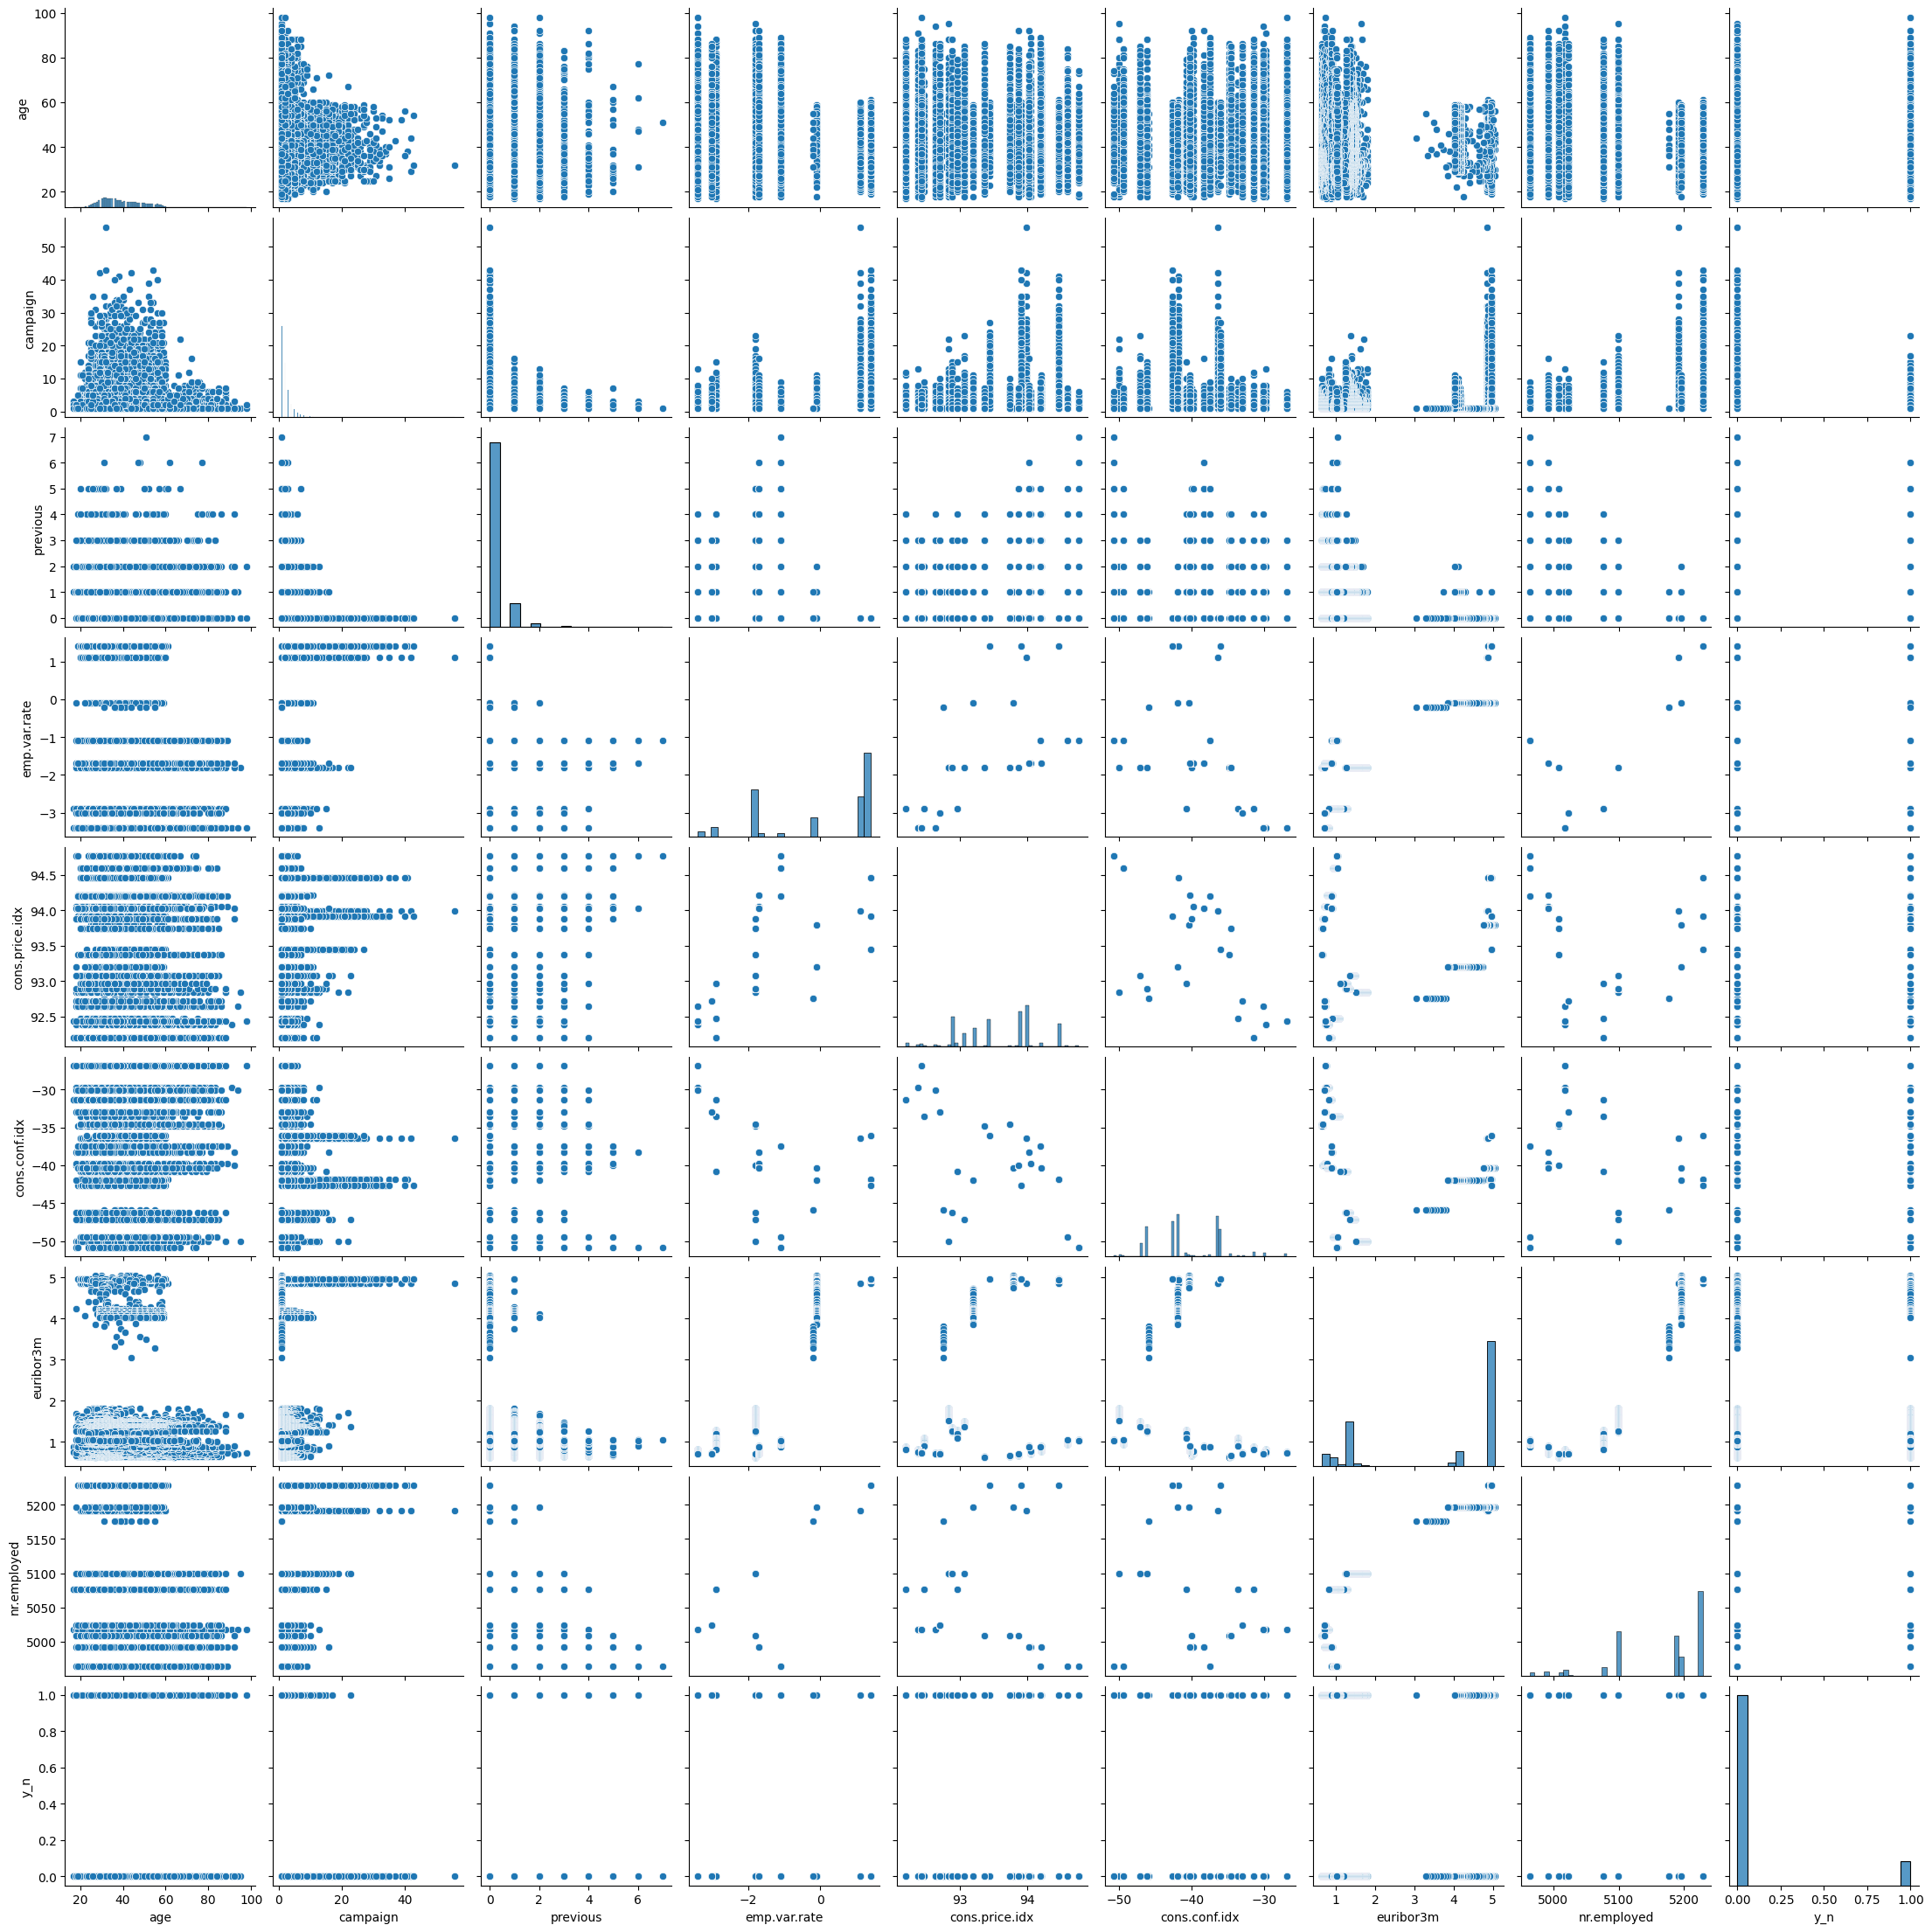

In [45]:
#muestra todo
sns.pairplot(data = df)

In [46]:
df.describe()


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.770318,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<Axes: ylabel='nr.employed'>

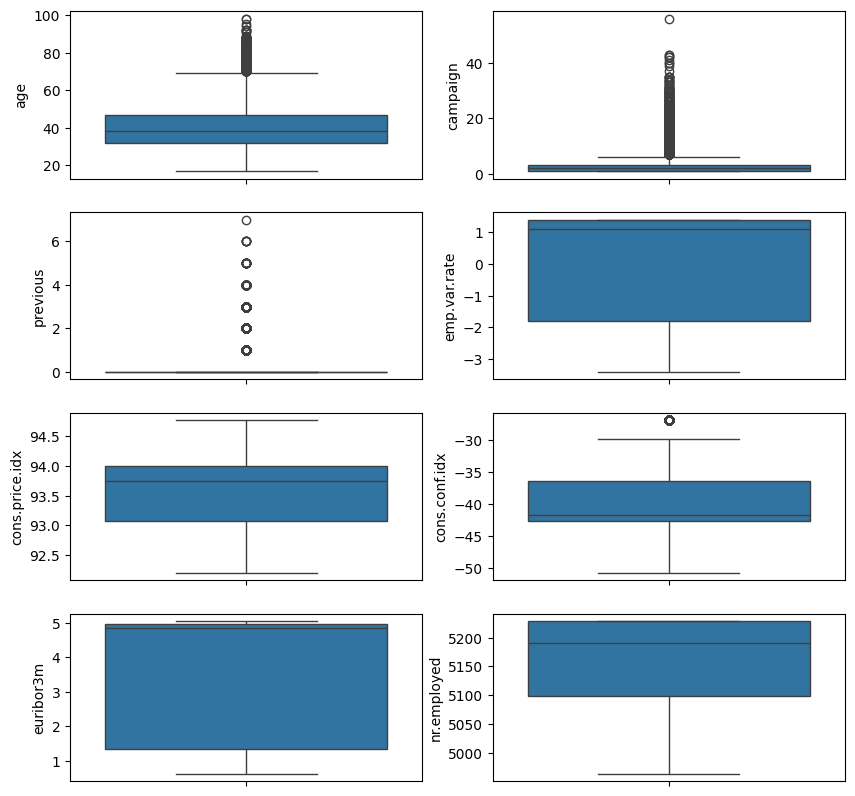

In [47]:
#valores atipicos
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = df, y = "previous")
sns.boxplot(ax = axis[1, 1], data = df, y = "emp.var.rate")
sns.boxplot(ax = axis[2, 0], data = df, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 1], data = df, y = "cons.conf.idx")
sns.boxplot(ax = axis[3, 0], data = df, y = "euribor3m")
sns.boxplot(ax = axis[3, 1], data = df, y = "nr.employed")

Observamos valores atípicos en las variables "age", "campaign", "previous" y "cons.conf.idx".

En la variable "age" tiene una media alrededor de 39 y los valores atípicos no parecen ser errores.

En la variable "campaign" hay bastante diferencia entre la media y el valor máximo. Analizaremos los valores atipicos.

Se ve que en la variable "previuos", la mayoría de los datos son 0. Puede ser una variable a eliminar.

En la variable "cons.conf.idx" no hay notable diferencia entre el máximo y la media. Los valores atípicos no parecen ser errores.

In [48]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de campaign
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [49]:
outliers_camp = df[df["campaign"] > 6]

outliers_camp

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n
887,54,admin.,married,university.degree,no,no,no,7,0,1.1,93.994,-36.4,4.856,5191.0,no,0
1043,41,technician,single,university.degree,unknown,no,no,8,0,1.1,93.994,-36.4,4.856,5191.0,no,0
1094,40,technician,married,professional.course,no,yes,no,8,0,1.1,93.994,-36.4,4.856,5191.0,no,0
1097,51,blue-collar,married,basic,unknown,yes,no,7,0,1.1,93.994,-36.4,4.856,5191.0,no,0
1230,48,blue-collar,divorced,basic,no,no,no,7,0,1.1,93.994,-36.4,4.855,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,retired,married,basic,no,no,no,9,1,-1.1,94.199,-37.5,0.883,4963.6,no,0
40631,88,retired,married,basic,no,yes,no,7,0,-1.1,94.199,-37.5,0.882,4963.6,no,0
40698,29,technician,single,professional.course,no,yes,no,7,5,-1.1,94.199,-37.5,0.879,4963.6,no,0
40821,33,technician,single,professional.course,no,yes,no,9,2,-1.1,94.199,-37.5,0.879,4963.6,no,0


In [50]:
outliers_camp.y.value_counts()


y
no     2295
yes     111
Name: count, dtype: int64

hay muchas personas que contratan el servicio despues de contactarlos 6 veces por eso no se elimina los valores atipicos

In [51]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de previous
Q1_prev = df['previous'].quantile(0.25)
Q3_prev = df['previous'].quantile(0.75)
IQR_prev = Q3_prev - Q1_prev

# Definir los límites inferior y superior
lower_limit_prev = Q1_prev - 1.5 * IQR_prev
upper_limit_prev= Q3_prev + 1.5 * IQR_prev

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_prev, 2)} y {round(lower_limit_prev, 2)}, con un rango intercuartílico de {round(IQR_prev, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 0.0 y 0.0, con un rango intercuartílico de 0.0


In [52]:
outliers_prev = df[df["previous"] > 0]

outliers_prev

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_n
24013,38,blue-collar,single,unknown,no,yes,no,1,1,-0.1,93.798,-40.4,4.968,5195.8,no,0
24019,40,services,married,high.school,no,yes,no,1,1,-0.1,93.798,-40.4,4.968,5195.8,yes,1
24076,36,admin.,married,university.degree,no,yes,no,1,1,-0.1,93.200,-42.0,4.663,5195.8,no,0
24102,36,admin.,married,high.school,no,yes,no,1,1,-0.1,93.200,-42.0,4.286,5195.8,yes,1
24108,37,admin.,married,university.degree,no,yes,no,1,1,-0.1,93.200,-42.0,4.286,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,1,6,-1.1,94.767,-50.8,1.031,4963.6,yes,1
41175,34,student,single,unknown,no,yes,no,1,2,-1.1,94.767,-50.8,1.031,4963.6,no,0
41178,62,retired,married,university.degree,no,no,no,2,3,-1.1,94.767,-50.8,1.031,4963.6,yes,1
41182,29,unemployed,single,basic,no,yes,no,1,1,-1.1,94.767,-50.8,1.028,4963.6,no,0


In [53]:
outliers_prev.y.value_counts()


y
no     4126
yes    1499
Name: count, dtype: int64

Notamos que hay bastantes clientes a quienes se lo contactaron alguna vez en la campaña anterior han contratado el depósito a largo plazo. Mantendremos los valores atípicos.



In [54]:
#valores faltamtes
df.isnull().sum().sort_values(ascending=False)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
dtype: int64

In [55]:
# Dividimos el conjunto de datos en muestras de train y test
#Se elimina la columna "y" del DataFrame df para crear la matriz de características X.
#axis=1 indica que la eliminación se hace por columnas
X = df.drop("y", axis = 1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
12348,29,entrepreneur,married,basic,no,yes,yes,3,0,1.4,93.918,-42.7,4.959,5228.1,0
8565,50,admin.,single,university.degree,no,no,no,6,0,1.4,94.465,-41.8,4.864,5228.1,0
21424,29,admin.,single,university.degree,no,no,no,4,0,1.4,93.444,-36.1,4.963,5228.1,0
3316,35,admin.,single,university.degree,no,no,no,1,0,1.1,93.994,-36.4,4.860,5191.0,0
33246,40,blue-collar,single,high.school,unknown,no,no,1,0,-1.8,92.893,-46.2,1.291,5099.1,0


In [57]:
num_variables=["age","campaign","emp.var.rate","cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"]


In [58]:
# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento pra evitar fuga
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()
#Estabiliza el entrenamiento: Escalar las características asegura que las magnitudes no dominen los cálculos.
#Este flujo es una buena práctica para preprocesar variables numéricas antes de entrenar modelos de aprendizaje automático

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,-1.058427,0.152155,0.838815,0.589534,-0.470932,0.771196,0.843413
8565,0.954767,1.229538,0.838815,1.534740,-0.276368,0.716413,0.843413
21424,-1.058427,0.511282,0.838815,-0.229530,0.955866,0.773502,0.843413
3316,-0.483229,-0.566100,0.647683,0.720860,0.891011,0.714107,0.330793
33246,-0.003897,-0.566100,-1.199927,-1.181648,-1.227566,-1.343979,-0.939011


In [59]:
# Crear copias de los datos originales
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# Crear un diccionario para almacenar un LabelEncoder por columna
encoders = {}

# Lista de columnas categóricas
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "previous"]

# Aplicar el LabelEncoder a cada columna categórica de X_train
for col in categorical_columns:
    encoder = LabelEncoder()  # Crear un nuevo LabelEncoder para cada columna
    X_train_cat_le[f'{col}_le'] = encoder.fit_transform(X_train[col])  # Codificar y agregar como nueva columna
    X_test_cat_le[f'{col}_le'] = encoder.transform(X_test[col])  # Aplicar la misma transformación a X_test
    encoders[col] = encoder  # Guardar el encoder por si lo necesitas más tarde

# Mostrar las primeras filas del DataFrame de entrenamiento transformado
X_train_cat_le.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,...,euribor3m,nr.employed,y_n,job_le,marital_le,education_le,default_le,housing_le,loan_le,previous_le
12348,29,entrepreneur,married,basic,no,yes,yes,3,0,1.4,...,4.959,5228.1,0,2,1,0,0,2,2,0
8565,50,admin.,single,university.degree,no,no,no,6,0,1.4,...,4.864,5228.1,0,0,2,4,0,0,0,0
21424,29,admin.,single,university.degree,no,no,no,4,0,1.4,...,4.963,5228.1,0,0,2,4,0,0,0,0
3316,35,admin.,single,university.degree,no,no,no,1,0,1.1,...,4.860,5191.0,0,0,2,4,0,0,0,0
33246,40,blue-collar,single,high.school,unknown,no,no,1,0,-1.8,...,1.291,5099.1,0,1,2,1,1,0,0,0


In [60]:
#codigo de unificacion de datos y selecion de caracteristicas
X_train_categorical=X_train_cat_le[["job_le","marital_le","education_le","default_le","housing_le","loan_le","previous_le"]]
X_test_categorical=X_test_cat_le[["job_le","marital_le","education_le","default_le","housing_le","loan_le","previous_le"]]

X_train_final = pd.concat([X_train_num_scal, X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_categorical], axis=1)

X_train_final.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_le,marital_le,education_le,default_le,housing_le,loan_le,previous_le
12348,-1.058427,0.152155,0.838815,0.589534,-0.470932,0.771196,0.843413,2,1,0,0,2,2,0
8565,0.954767,1.229538,0.838815,1.534740,-0.276368,0.716413,0.843413,0,2,4,0,0,0,0
21424,-1.058427,0.511282,0.838815,-0.229530,0.955866,0.773502,0.843413,0,2,4,0,0,0,0
3316,-0.483229,-0.566100,0.647683,0.720860,0.891011,0.714107,0.330793,0,2,4,0,0,0,0
33246,-0.003897,-0.566100,-1.199927,-1.181648,-1.227566,-1.343979,-0.939011,1,2,1,1,0,0,0


In [61]:
# genera el modelo 
model = LogisticRegression()

# entrena
model.fit(X_train_final, y_train)

LogisticRegression()

In [62]:
y_pred = model.predict(X_test_final)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [63]:
#precicion de efectividad
accuracy_score(y_test, y_pred)


0.8867168528411851

In [65]:
#evitar advertencias derivandolas a un lugar donde no hacen nada :D
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [66]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [67]:
grid.fit(X_train_final, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [68]:
model_grid = LogisticRegression(penalty = "l2", C = 0.01, solver = "newton-cg")
model_grid.fit(X_train_final, y_train)
y_pred = model_grid.predict(X_test_final)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8873239436619719

se ve una mejora en el tercer decimal.
Nos quedamos con este ya que tiene mayor precision.

In [69]:
mejor_modelo=model_grid

y_pred = mejor_modelo.predict(X_test_final)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [56]:
#para factorizar puede servir esta plantilla
df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["day_of_week"] = pd.factorize(df["day_of_week"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]
df["y"] = pd.factorize(df["y"])[0]


KeyError: 'contact'

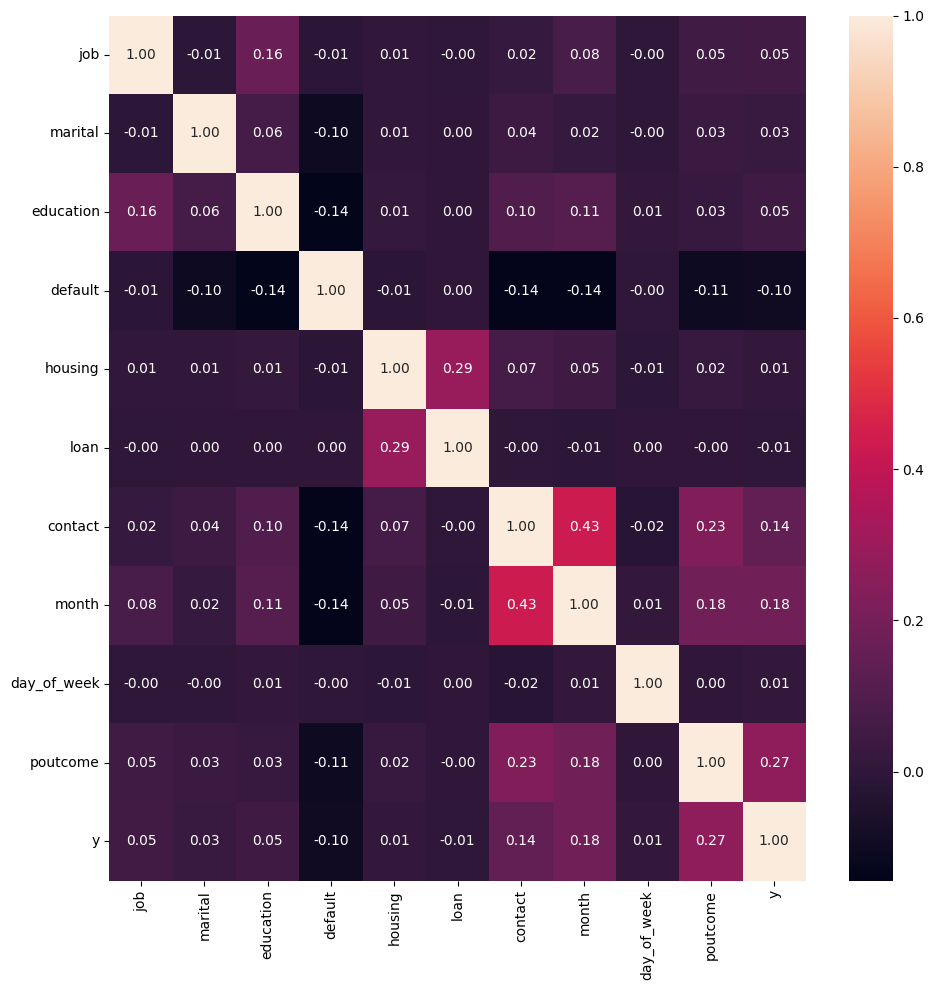

In [12]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["job", "marital", "education", "default", "housing", "loan", "contact", "month","day_of_week","poutcome","y"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

se ve una relacion entre prestamo de vivienda y prestamo personal.
se ve una una relacion entre el tipo de contacto y el ultimo mes en que se a contactado

la relacion mas clara que vemos es que la duracion del contacto previo en segundos disminuye con la cantidad de contactos en la campaña

In [ ]:
X_train = train_data.drop(["Survived"], axis = 1)
y_train = train_data["Survived"]

X_test = test_data.drop(["Survived"], axis = 1)
y_test = test_data["Survived"]

In [ ]:
# genera el modelo
model = LogisticRegression()

# entrena
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)